In [1]:
import pandas as pd
import json
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from io import StringIO
%matplotlib inline

In [2]:
df_listings_details = pd.read_csv('../data/listings_detailed.csv')
df_listings = pd.read_csv('../data/listings.csv')

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('future.no_silent_downcasting', True)

In [4]:
selected_columns = ['room_type', 'minimum_nights', 'neighbourhood',
   'availability_eoy', 'availability_365', 
    'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_identity_verified',
    'accommodates', 'bathrooms', 'bedrooms', 'beds',
    'estimated_occupancy_l365d', 'estimated_revenue_l365d',
    'number_of_reviews', 'number_of_reviews_l30d', 'reviews_per_month', 
    'review_scores_rating', 'review_scores_value', 
    'instant_bookable', 'calculated_host_listings_count', 'price']


In [5]:
def normalize_tf_cols(df, column):
    df[column] = df[column].replace({'t': 1, 'f': 0}).astype(bool)
    return df

In [6]:
def fix_encoding(df_cleaned):
    encoding_map = {}
    for val in df_cleaned['neighbourhood'].unique():
        try:
            clean_val = val.encode("latin1").decode("utf-8", errors="ignore")
            encoding_map[val] = clean_val
        except (UnicodeEncodeError, AttributeError):
            encoding_map[val] = val
    df_cleaned['neighbourhood'] = df_cleaned['neighbourhood'].map(encoding_map)
    return df_cleaned

In [7]:
def data_cleanup(df_1, df_2):
    df_merged_listings = pd.concat([df_listings, df_listings_details], axis=1)
    df_merged_listings = df_merged_listings.loc[:, ~df_merged_listings.columns.duplicated()]
    df_cleaned = df_merged_listings[selected_columns].dropna() 
    df_cleaned = df_cleaned[df_cleaned['availability_eoy']> 0]
    df_cleaned = df_cleaned[df_cleaned['availability_365']> 0]
    df_cleaned = df_cleaned[df_cleaned['estimated_occupancy_l365d']> 0]
    df_cleaned['host_response_rate'] = df_cleaned['host_response_rate'].str.replace('%', '', regex=False).astype(float)
    df_cleaned['host_acceptance_rate'] = df_cleaned['host_acceptance_rate'].str.replace('%', '', regex=False).astype(float)
    df_cleaned = normalize_tf_cols(df_cleaned, 'instant_bookable')
    df_cleaned = normalize_tf_cols(df_cleaned, 'host_identity_verified')
    df_cleaned = normalize_tf_cols(df_cleaned, 'host_is_superhost')
    df_cleaned = fix_encoding(df_cleaned)
    df_cleaned.columns = df_cleaned.columns.str.replace('/','_')
    df_cleaned.columns = df_cleaned.columns.str.lower()
    df_cleaned.columns = df_cleaned.columns.str.replace(' ','_')
    return df_cleaned

In [8]:
df_cleaned = data_cleanup(df_listings, df_listings_details)

In [9]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6794 entries, 1 to 14071
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   room_type                       6794 non-null   object 
 1   minimum_nights                  6794 non-null   int64  
 2   neighbourhood                   6794 non-null   object 
 3   availability_eoy                6794 non-null   int64  
 4   availability_365                6794 non-null   int64  
 5   host_response_rate              6794 non-null   float64
 6   host_acceptance_rate            6794 non-null   float64
 7   host_is_superhost               6794 non-null   bool   
 8   host_identity_verified          6794 non-null   bool   
 9   accommodates                    6794 non-null   int64  
 10  bathrooms                       6794 non-null   float64
 11  bedrooms                        6794 non-null   float64
 12  beds                            6794 n

In [10]:
df_cleaned.describe()

,minimum_nights,availability_eoy,availability_365,host_response_rate,host_acceptance_rate,accommodates,bathrooms,bedrooms,beds,estimated_occupancy_l365d,estimated_revenue_l365d,number_of_reviews,number_of_reviews_l30d,reviews_per_month,review_scores_rating,review_scores_value,calculated_host_listings_count,price
count,6794.000000,6794.000000,6794.000000,6794.000000,6794.000000,6794.000000,6794.000000,6794.000000,6794.000000,6794.000000,6794.000000,6794.000000,6794.000000,6794.000000,6794.000000,6794.000000,6794.000000,6794.000000
mean,4.817192,59.923903,222.342214,96.114513,93.342361,3.700913,1.170960,1.302914,2.043421,107.284663,11554.359288,65.227259,1.634089,2.077552,4.670162,4.617053,24.238446,122.452605
std,10.793642,29.050927,110.310661,12.040469,15.039981,1.969002,0.442428,0.874976,1.304071,89.770409,16927.513600,98.487610,2.234993,2.015569,0.459623,0.439868,45.404163,306.778495
min,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,6.000000,126.000000,1.000000,0.000000,0.030000,1.000000,1.000000,1.000000,18.000000
25%,1.000000,37.000000,125.000000,99.000000,96.000000,2.000000,1.000000,1.000000,1.000000,24.000000,2520.000000,7.000000,0.000000,0.640000,4.600000,4.530000,2.000000,65.000000
50%,2.000000,62.000000,254.000000,100.000000,99.000000,4.000000,1.000000,1.000000,2.000000,78.000000,7242.000000,26.000000,1.000000,1.480000,4.790000,4.720000,6.000000,90.000000
75%,3.000000,84.000000,319.000000,100.000000,100.000000,4.000000,1.000000,2.000000,3.000000,186.000000,15832.500000,82.000000,2.000000,2.950000,4.920000,4.840000,22.000000,132.000000
max,200.000000,109.000000,365.000000,100.000000,100.000000,16.000000,9.000000,14.000000,20.000000,255.000000,756000.000000,1347.000000,31.000000,26.450000,5.000000,5.000000,396.000000,10000.000000


In [11]:
df_cleaned.nunique()

room_type                            4
minimum_nights                      43
neighbourhood                       23
availability_eoy                   109
availability_365                   365
host_response_rate                  56
host_acceptance_rate                98
host_is_superhost                    2
host_identity_verified               2
accommodates                        16
bathrooms                           16
bedrooms                            11
beds                                17
estimated_occupancy_l365d           87
estimated_revenue_l365d           2305
number_of_reviews                  463
number_of_reviews_l30d              23
reviews_per_month                  791
review_scores_rating               142
review_scores_value                140
instant_bookable                     2
calculated_host_listings_count      56
price                              426
dtype: int64

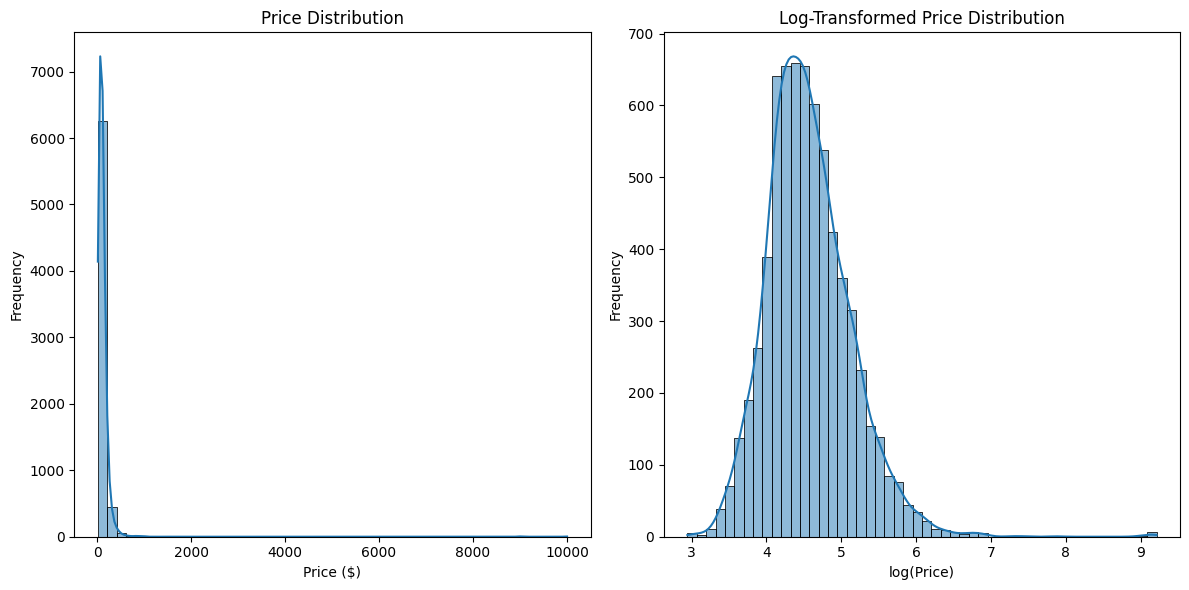

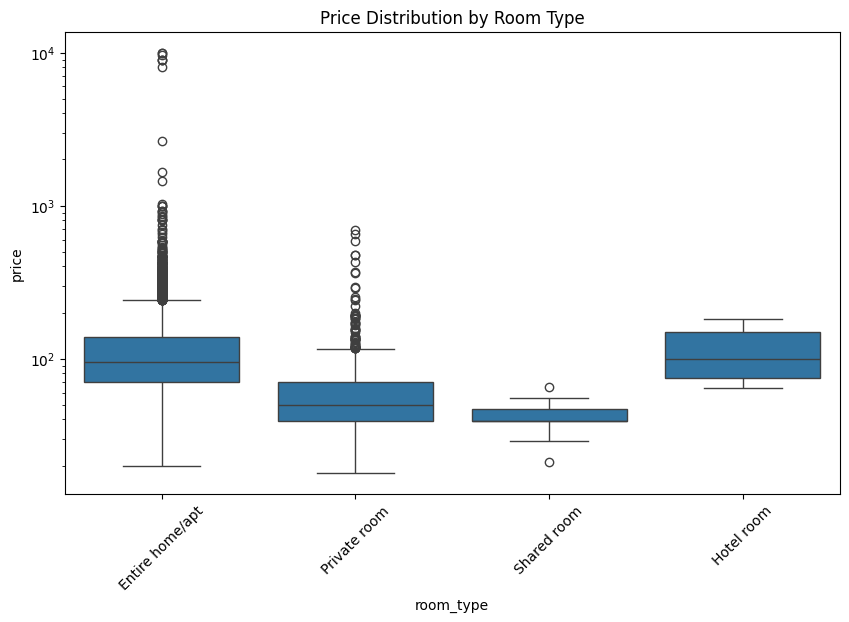

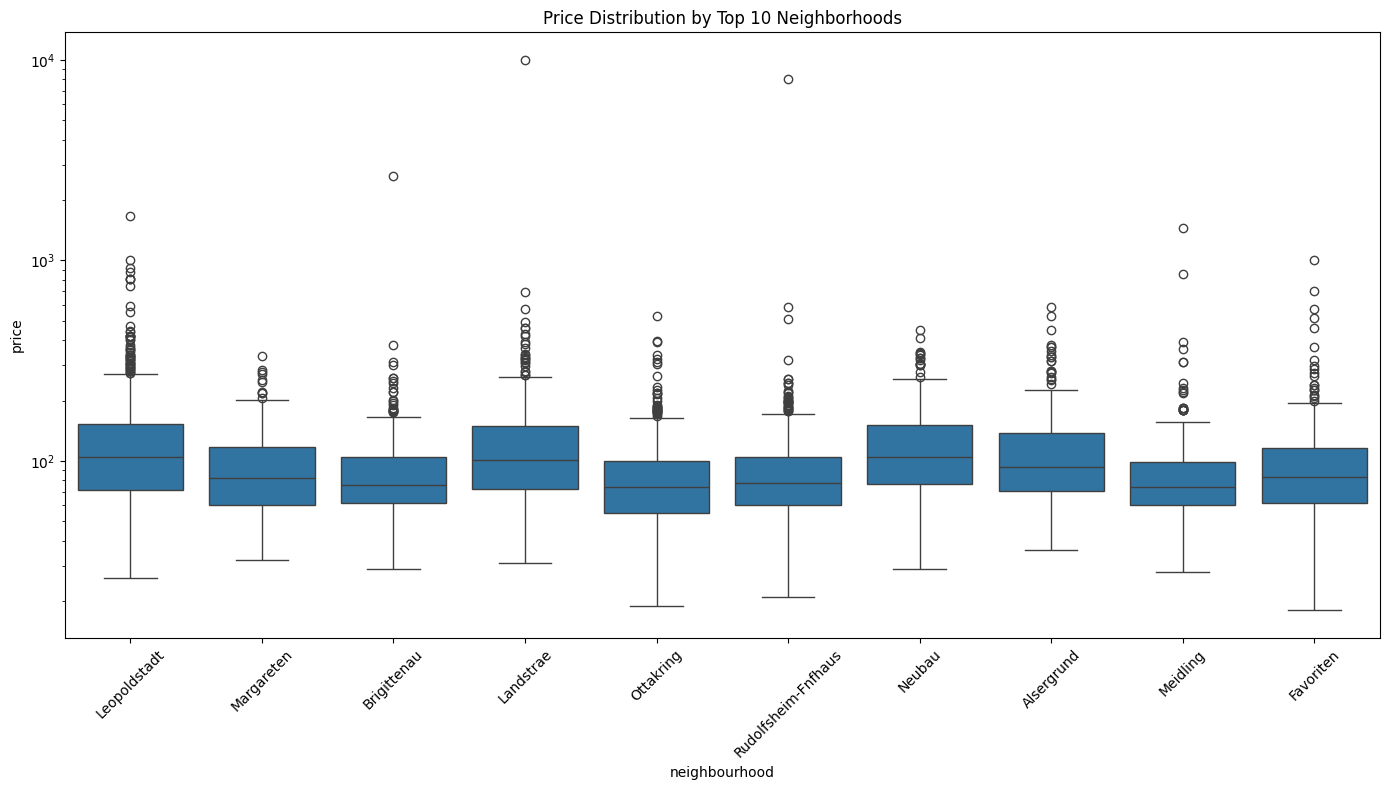

In [12]:
# A. Price Distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['price'], kde=True, bins=50)
plt.title('Price Distribution')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df_cleaned['price']), kde=True, bins=50)
plt.title('Log-Transformed Price Distribution')
plt.xlabel('log(Price)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# B. Price by Room Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=df_cleaned)
plt.title('Price Distribution by Room Type')
plt.xticks(rotation=45)
plt.yscale('log')  # Use log scale for better visualization
plt.show()

# C. Price by Neighborhood (Top 10)
top_neighborhoods = df_cleaned['neighbourhood'].value_counts().nlargest(10).index
df_top = df_cleaned[df_cleaned['neighbourhood'].isin(top_neighborhoods)]

plt.figure(figsize=(14, 8))
sns.boxplot(x='neighbourhood', y='price', data=df_top)
plt.title('Price Distribution by Top 10 Neighborhoods')
plt.xticks(rotation=45)
plt.yscale('log')
plt.tight_layout()
plt.show()

In [ ]:
# A. Listings Count by Neighborhood (Horizontal Bar)
plt.figure(figsize=(12, 8))
neighborhood_counts = df_cleaned['neighbourhood'].value_counts().nlargest(15)
sns.barplot(x=neighborhood_counts.values, y=neighborhood_counts.index)
plt.title('Top 15 Neighborhoods by Number of Listings')
plt.xlabel('Number of Listings')
plt.tight_layout()
plt.show()

# B. Average Price Heatmap by Neighborhood
neighborhood_prices = df_cleaned.groupby('neighbourhood')['price'].agg(['mean', 'count'])
neighborhood_prices = neighborhood_prices[neighborhood_prices['count'] > 10]  # Filter for reliable estimates
top_20 = neighborhood_prices.nlargest(20, 'count')

plt.figure(figsize=(12, 8))
heatmap_data = top_20['mean'].sort_values(ascending=False).to_frame()
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='RdYlGn_r')
plt.title('Average Price by Neighborhood (Top 20 by Listings Count)')
plt.tight_layout()
plt.show()

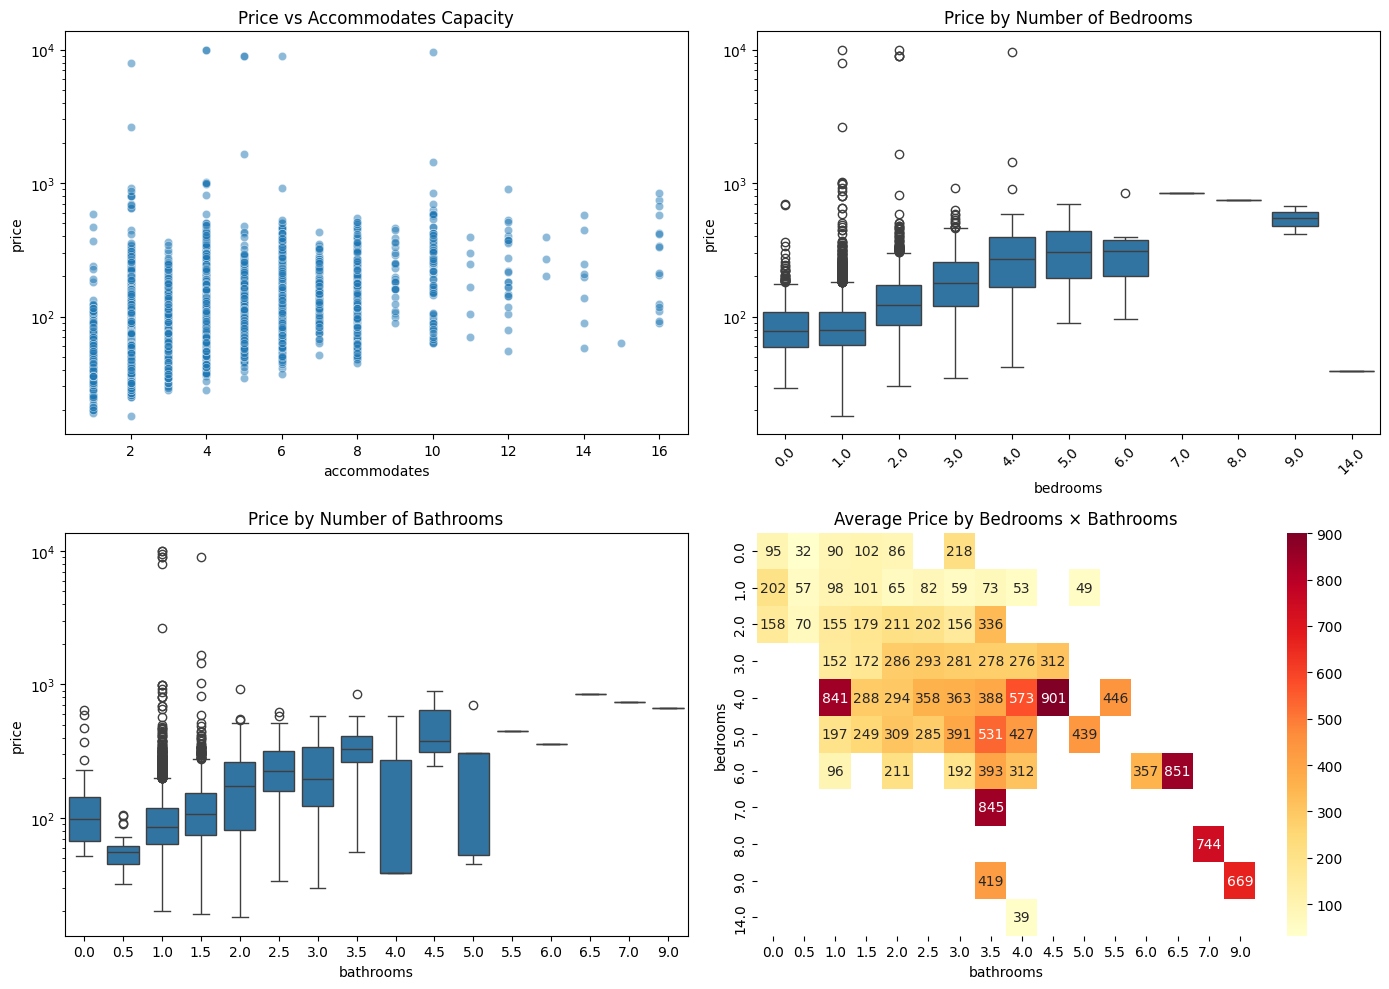

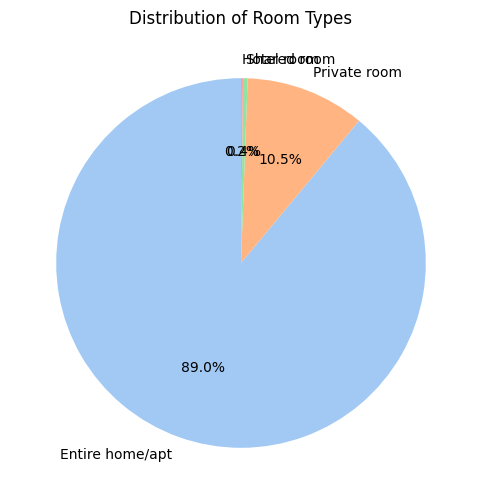

In [13]:
# A. Property Size Relationships
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Price vs Accommodates
sns.scatterplot(ax=axes[0, 0], x='accommodates', y='price', data=df_cleaned, alpha=0.5)
axes[0, 0].set_title('Price vs Accommodates Capacity')
axes[0, 0].set_yscale('log')

# Price vs Bedrooms
sns.boxplot(ax=axes[0, 1], x='bedrooms', y='price', data=df_cleaned)
axes[0, 1].set_title('Price by Number of Bedrooms')
axes[0, 1].set_yscale('log')
axes[0, 1].tick_params(axis='x', rotation=45)

# Price vs Bathrooms
sns.boxplot(ax=axes[1, 0], x='bathrooms', y='price', data=df_cleaned)
axes[1, 0].set_title('Price by Number of Bathrooms')
axes[1, 0].set_yscale('log')

# Bedrooms vs Bathrooms Heatmap
bed_bath_price = df_cleaned.groupby(['bedrooms', 'bathrooms'])['price'].mean().unstack()
sns.heatmap(ax=axes[1, 1], data=bed_bath_price, cmap='YlOrRd', annot=True, fmt='.0f')
axes[1, 1].set_title('Average Price by Bedrooms × Bathrooms')

plt.tight_layout()
plt.show()

# B. Room Type Distribution
plt.figure(figsize=(10, 6))
room_type_counts = df_cleaned['room_type'].value_counts()
colors = sns.color_palette('pastel')
plt.pie(room_type_counts.values, labels=room_type_counts.index, autopct='%1.1f%%', 
        colors=colors, startangle=90)
plt.title('Distribution of Room Types')
plt.show()

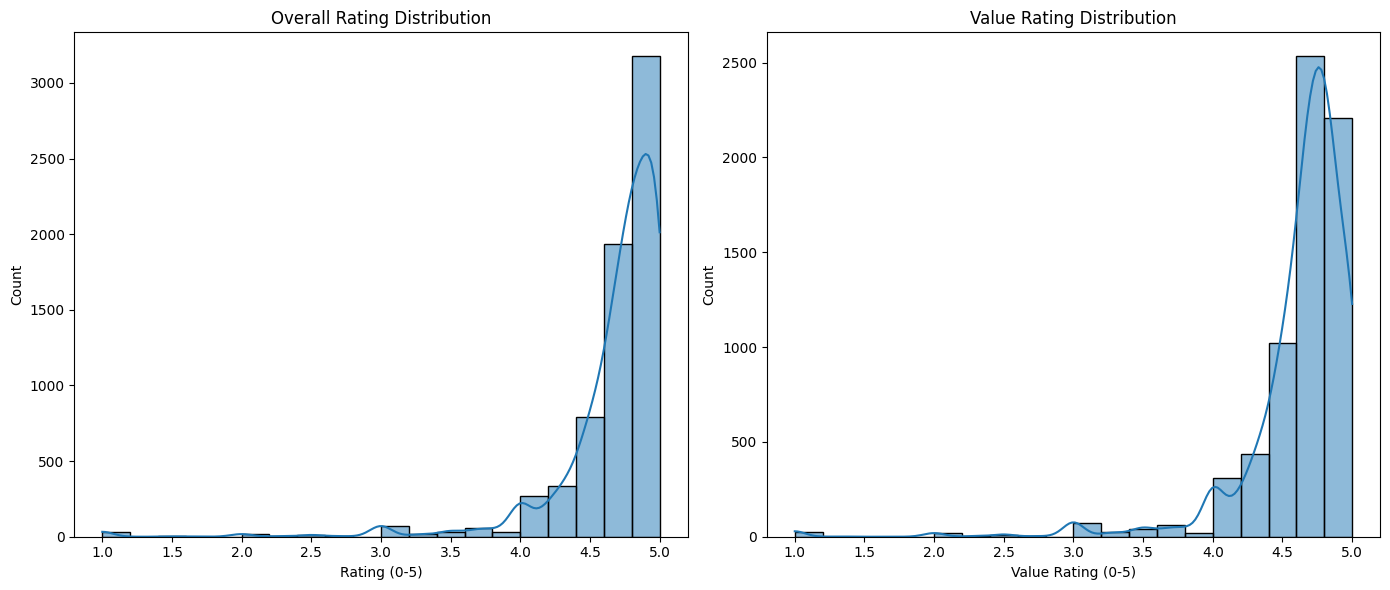

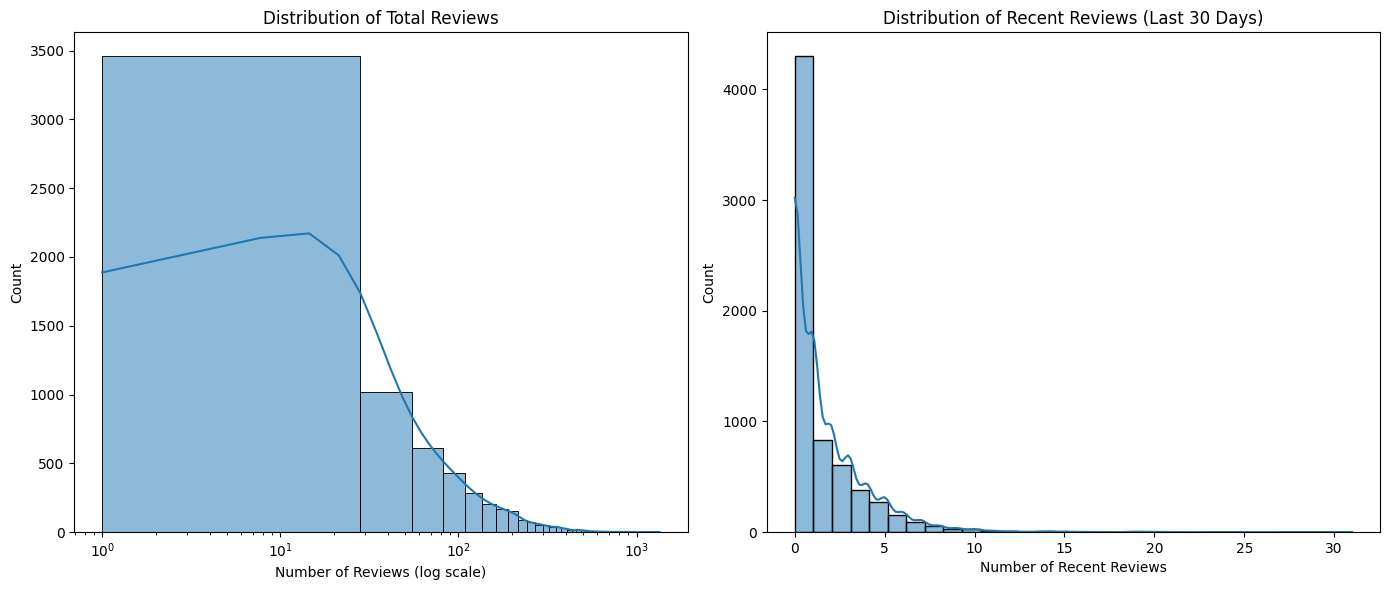

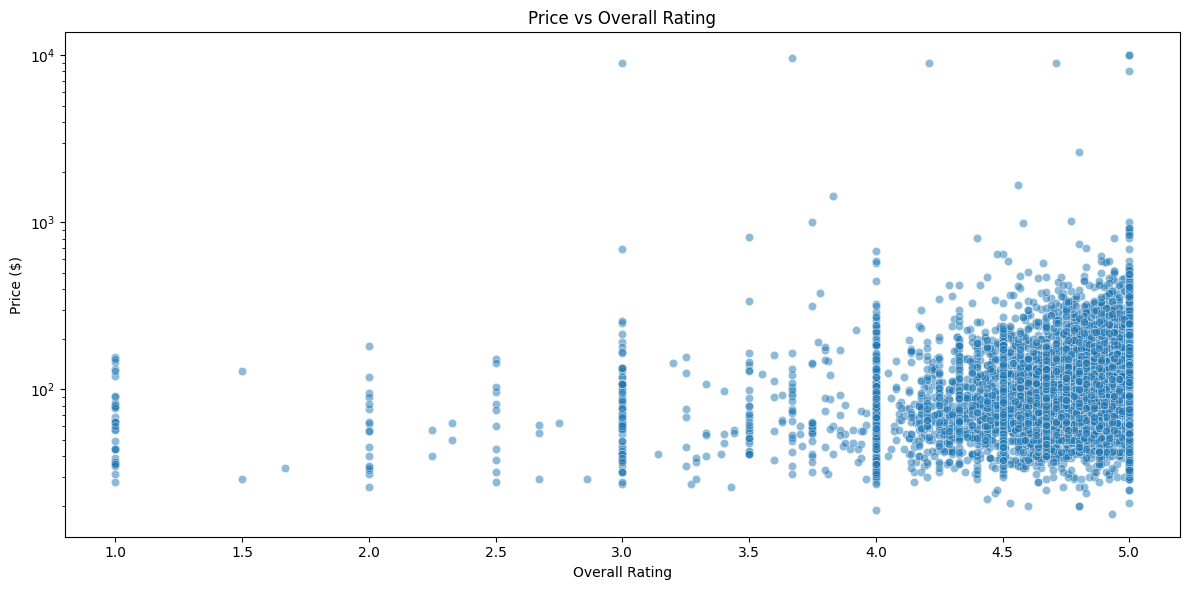

In [14]:
# A. Rating Distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Overall Rating Distribution
sns.histplot(ax=axes[0], x='review_scores_rating', data=df_cleaned, bins=20, kde=True)
axes[0].set_title('Overall Rating Distribution')
axes[0].set_xlabel('Rating (0-5)')

# Value Rating Distribution
sns.histplot(ax=axes[1], x='review_scores_value', data=df_cleaned, bins=20, kde=True)
axes[1].set_title('Value Rating Distribution')
axes[1].set_xlabel('Value Rating (0-5)')

plt.tight_layout()
plt.show()

# B. Review Activity Over Time
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Total Reviews Distribution
sns.histplot(ax=axes[0], x='number_of_reviews', data=df_cleaned, bins=50, kde=True)
axes[0].set_title('Distribution of Total Reviews')
axes[0].set_xscale('log')
axes[0].set_xlabel('Number of Reviews (log scale)')

# Recent Reviews (Last 30 days)
sns.histplot(ax=axes[1], x='number_of_reviews_l30d', data=df_cleaned, bins=30, kde=True)
axes[1].set_title('Distribution of Recent Reviews (Last 30 Days)')
axes[1].set_xlabel('Number of Recent Reviews')

plt.tight_layout()
plt.show()

# C. Rating vs Price
plt.figure(figsize=(12, 6))
sns.scatterplot(x='review_scores_rating', y='price', data=df_cleaned, alpha=0.5)
plt.title('Price vs Overall Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Price ($)')
plt.yscale('log')
plt.tight_layout()
plt.show()

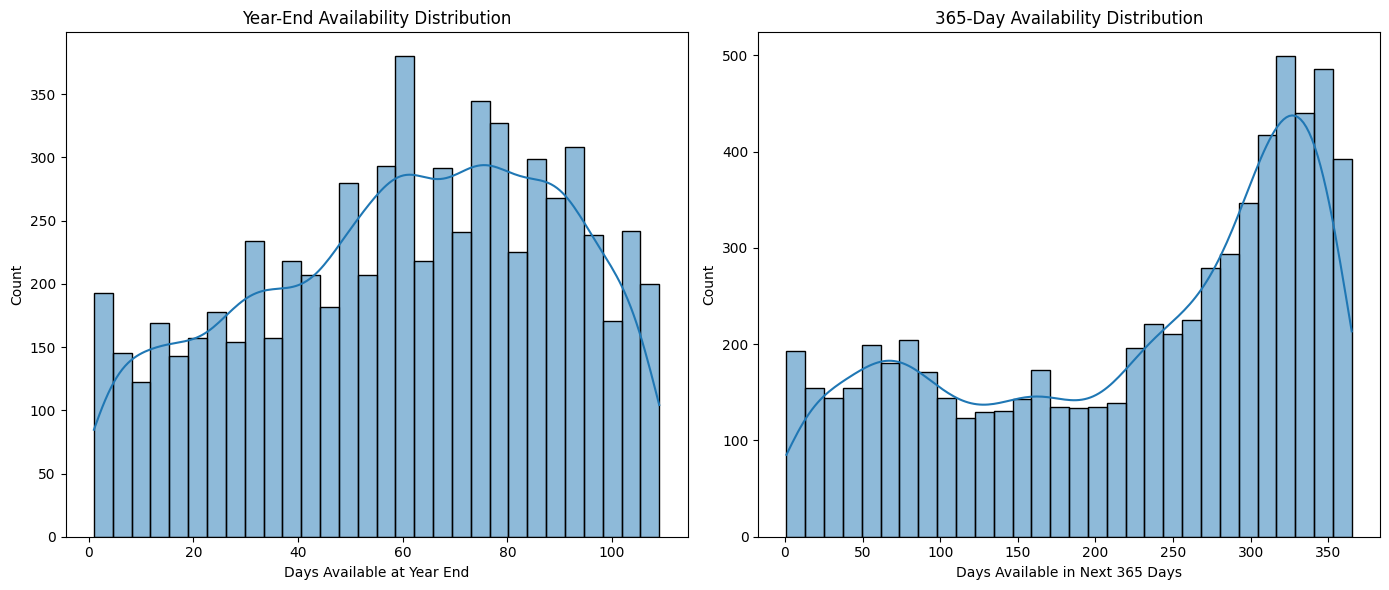

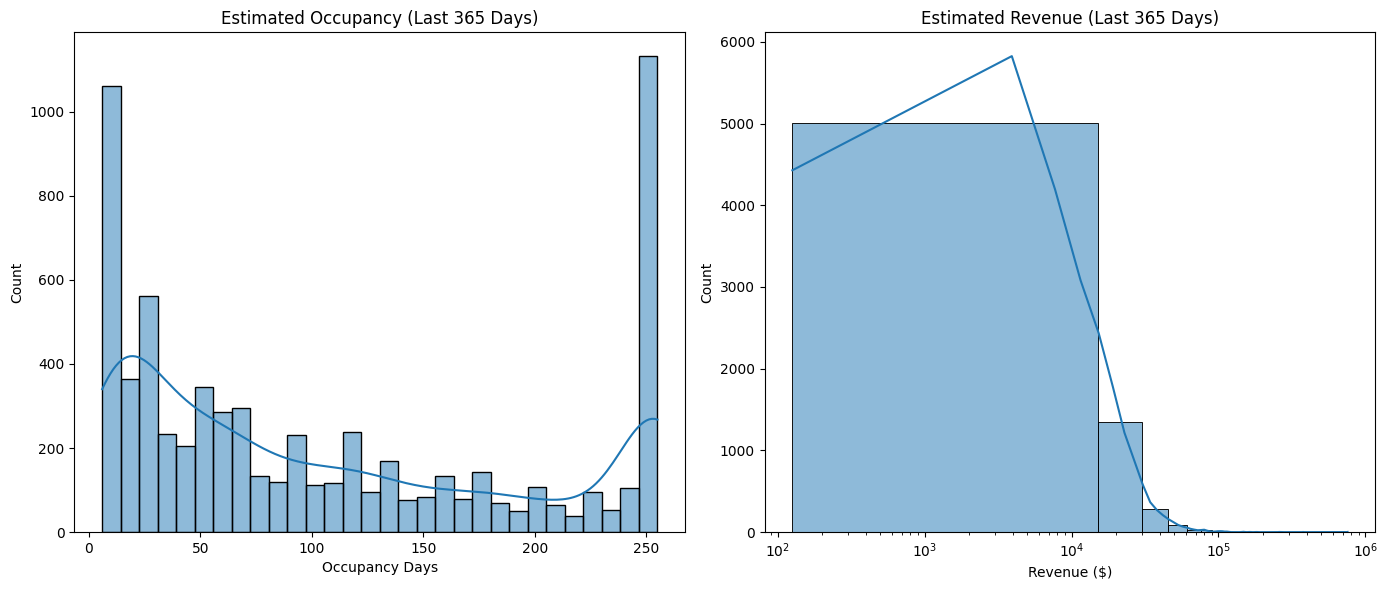

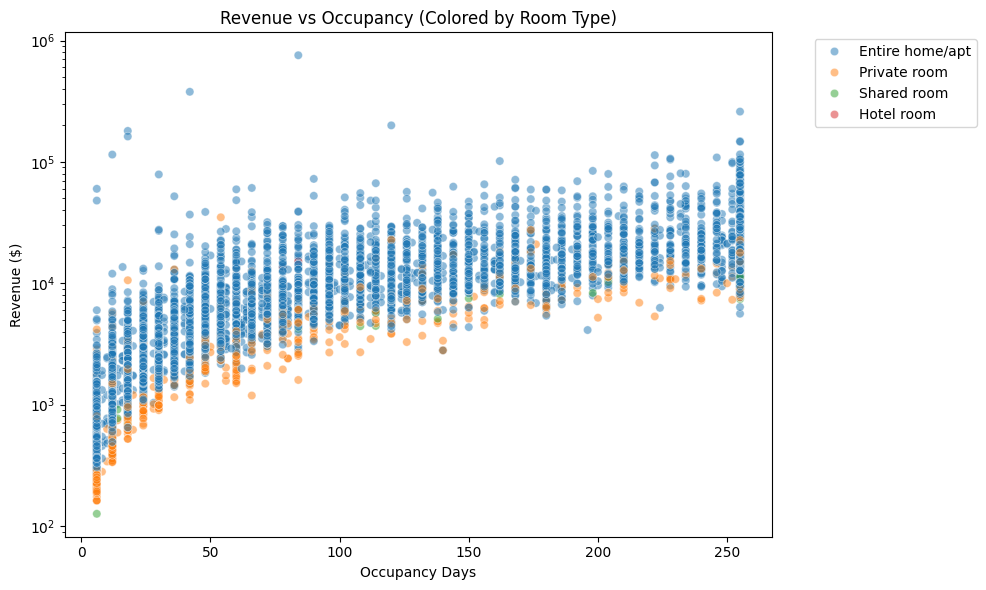

In [15]:
# A. Availability Analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Year-End Availability
sns.histplot(ax=axes[0], x='availability_eoy', data=df_cleaned, bins=30, kde=True)
axes[0].set_title('Year-End Availability Distribution')
axes[0].set_xlabel('Days Available at Year End')

# 365-Day Availability
sns.histplot(ax=axes[1], x='availability_365', data=df_cleaned, bins=30, kde=True)
axes[1].set_title('365-Day Availability Distribution')
axes[1].set_xlabel('Days Available in Next 365 Days')

plt.tight_layout()
plt.show()

# B. Occupancy vs Revenue
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Occupancy Distribution
sns.histplot(ax=axes[0], x='estimated_occupancy_l365d', data=df_cleaned, bins=30, kde=True)
axes[0].set_title('Estimated Occupancy (Last 365 Days)')
axes[0].set_xlabel('Occupancy Days')

# Revenue Distribution
sns.histplot(ax=axes[1], x='estimated_revenue_l365d', data=df_cleaned, bins=50, kde=True)
axes[1].set_title('Estimated Revenue (Last 365 Days)')
axes[1].set_xlabel('Revenue ($)')
axes[1].set_xscale('log')

plt.tight_layout()
plt.show()

# C. Revenue vs Occupancy Scatter
plt.figure(figsize=(10, 6))
sns.scatterplot(x='estimated_occupancy_l365d', y='estimated_revenue_l365d', 
                data=df_cleaned, alpha=0.5, hue='room_type')
plt.title('Revenue vs Occupancy (Colored by Room Type)')
plt.xlabel('Occupancy Days')
plt.ylabel('Revenue ($)')
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

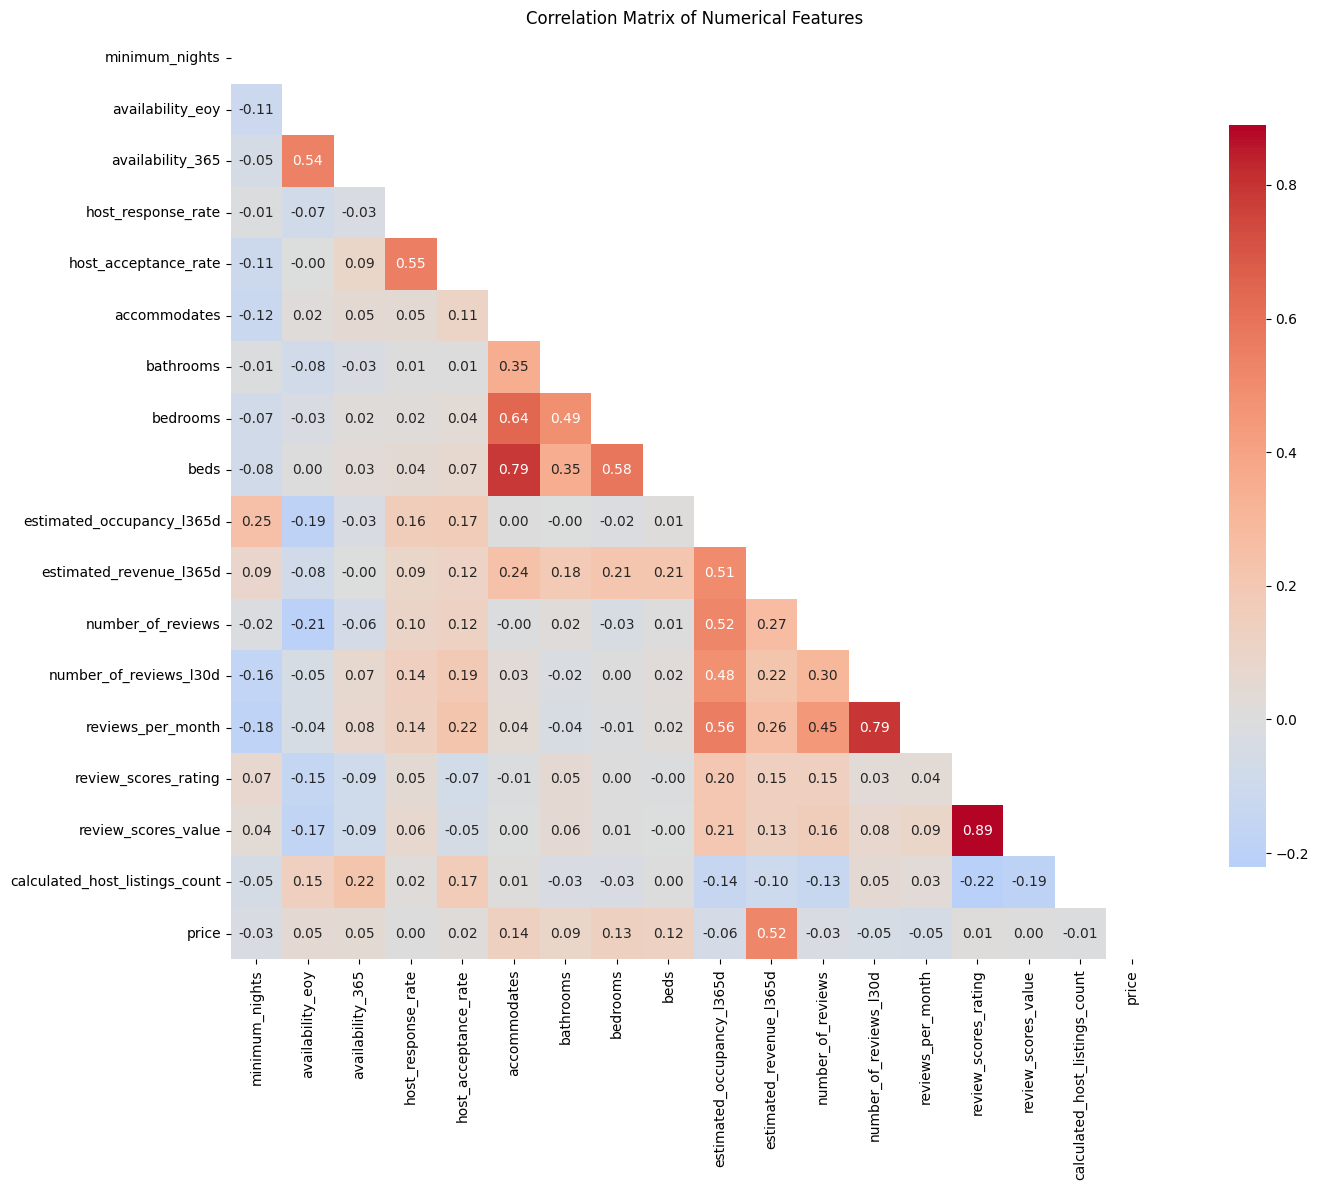

In [16]:
# Select numerical columns for correlation
numerical_cols = ['minimum_nights', 'availability_eoy', 'availability_365',
                  'host_response_rate', 'host_acceptance_rate',
                  'accommodates', 'bathrooms', 'bedrooms', 'beds',
                  'estimated_occupancy_l365d', 'estimated_revenue_l365d',
                  'number_of_reviews', 'number_of_reviews_l30d', 'reviews_per_month',
                  'review_scores_rating', 'review_scores_value',
                  'calculated_host_listings_count', 'price']

# Filter columns that exist in dataframe
existing_numerical = [col for col in numerical_cols if col in df_cleaned.columns]

# Calculate correlation matrix
corr_matrix = df_cleaned[existing_numerical].corr()

# Create heatmap
plt.figure(figsize=(16, 12))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Mask upper triangle
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', 
            cmap='coolwarm', center=0, square=True,
            cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

/var/folders/32/2sy0mttn5h569fkh9_bgvm680000gn/T/ipykernel_31925/2050463249.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0, 0], x='avg_price', y=top_neighborhoods_price.index,
/var/folders/32/2sy0mttn5h569fkh9_bgvm680000gn/T/ipykernel_31925/2050463249.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 1].set_xticklabels(['No', 'Yes'])


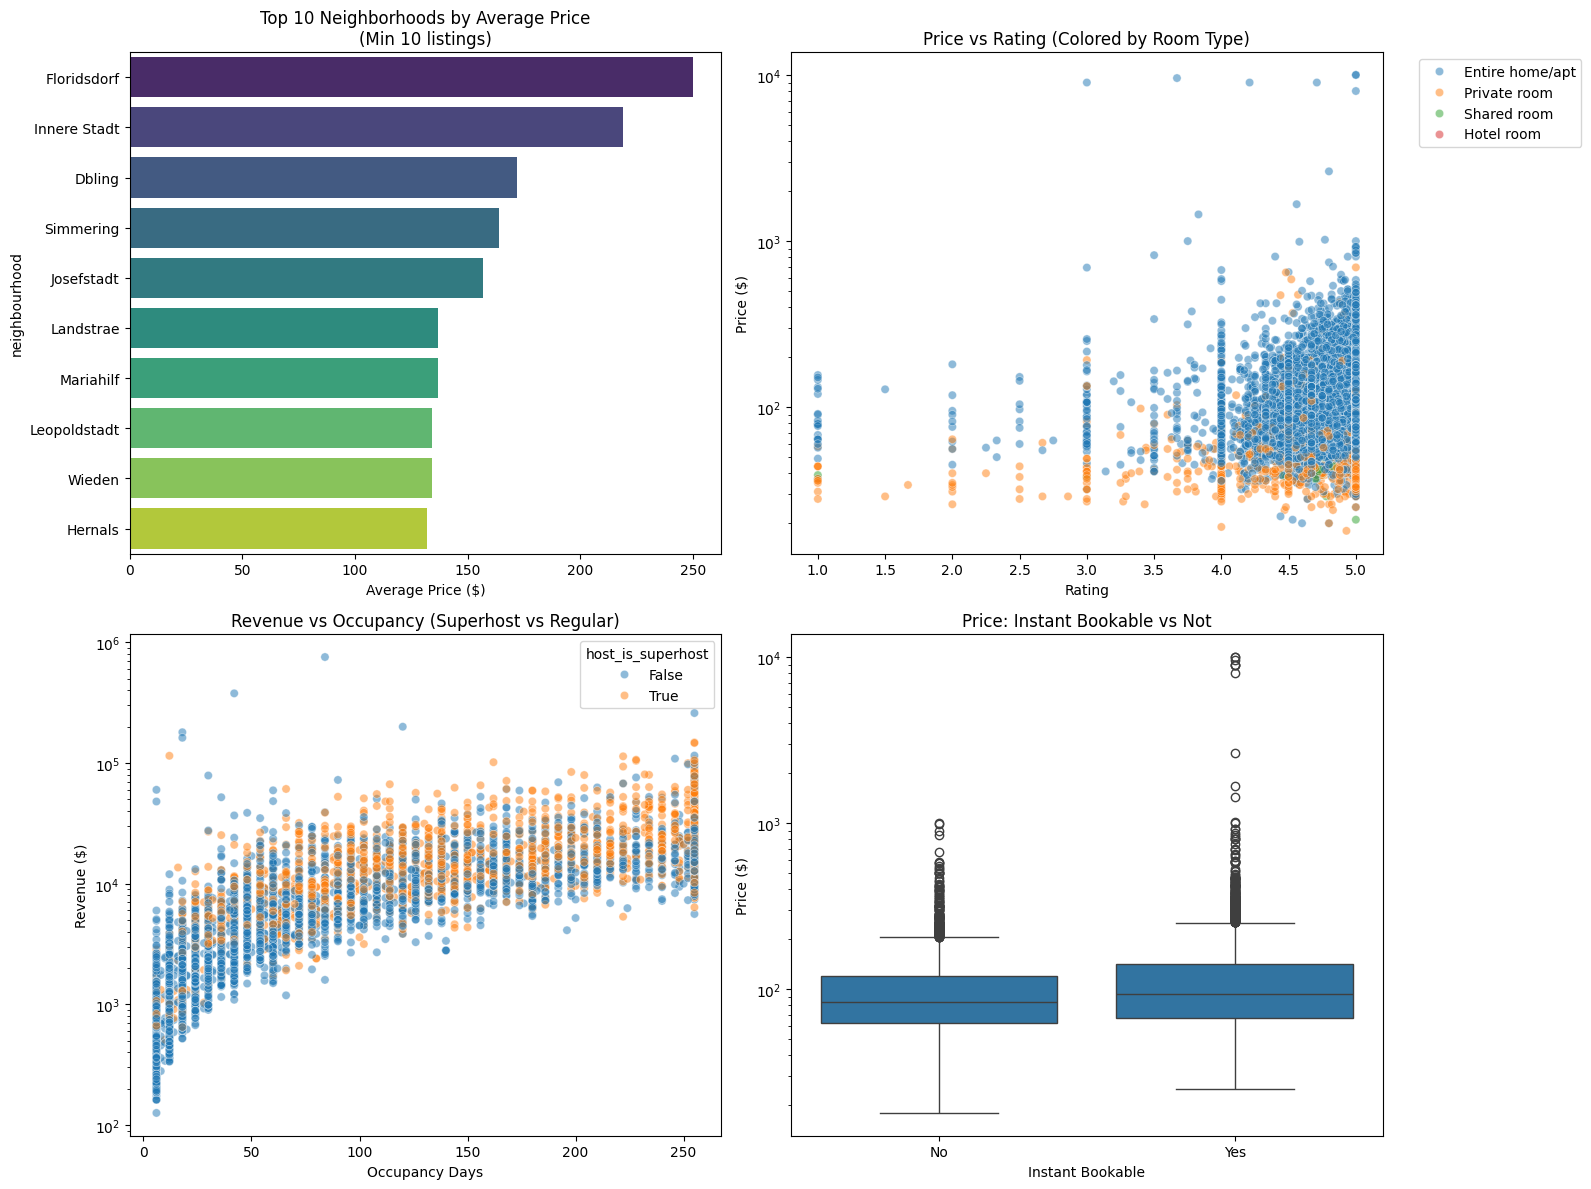

In [17]:
# Create a 2x2 dashboard of key insights
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Top neighborhoods by average price (with sufficient listings)
neighborhood_stats = df_cleaned.groupby('neighbourhood').agg({
    'price': ['mean', 'count']
}).round(0)
neighborhood_stats.columns = ['avg_price', 'count']
neighborhood_stats = neighborhood_stats[neighborhood_stats['count'] > 10]
top_neighborhoods_price = neighborhood_stats.nlargest(10, 'avg_price')

sns.barplot(ax=axes[0, 0], x='avg_price', y=top_neighborhoods_price.index, 
            data=top_neighborhoods_price, palette='viridis')
axes[0, 0].set_title('Top 10 Neighborhoods by Average Price\n(Min 10 listings)')
axes[0, 0].set_xlabel('Average Price ($)')

# 2. Price vs Rating by Room Type
sns.scatterplot(ax=axes[0, 1], x='review_scores_rating', y='price', 
                hue='room_type', data=df_cleaned, alpha=0.5)
axes[0, 1].set_title('Price vs Rating (Colored by Room Type)')
axes[0, 1].set_xlabel('Rating')
axes[0, 1].set_ylabel('Price ($)')
axes[0, 1].set_yscale('log')
axes[0, 1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 3. Occupancy vs Revenue by Superhost status
sns.scatterplot(ax=axes[1, 0], x='estimated_occupancy_l365d', 
                y='estimated_revenue_l365d', 
                hue='host_is_superhost', data=df_cleaned, alpha=0.5)
axes[1, 0].set_title('Revenue vs Occupancy (Superhost vs Regular)')
axes[1, 0].set_xlabel('Occupancy Days')
axes[1, 0].set_ylabel('Revenue ($)')
axes[1, 0].set_yscale('log')

# 4. Instant Bookable Impact on Price
sns.boxplot(ax=axes[1, 1], x='instant_bookable', y='price', data=df_cleaned)
axes[1, 1].set_title('Price: Instant Bookable vs Not')
axes[1, 1].set_xlabel('Instant Bookable')
axes[1, 1].set_ylabel('Price ($)')
axes[1, 1].set_yscale('log')
axes[1, 1].set_xticklabels(['No', 'Yes'])

plt.tight_layout()
plt.show()

Creating Airbnb Data Visualizations...


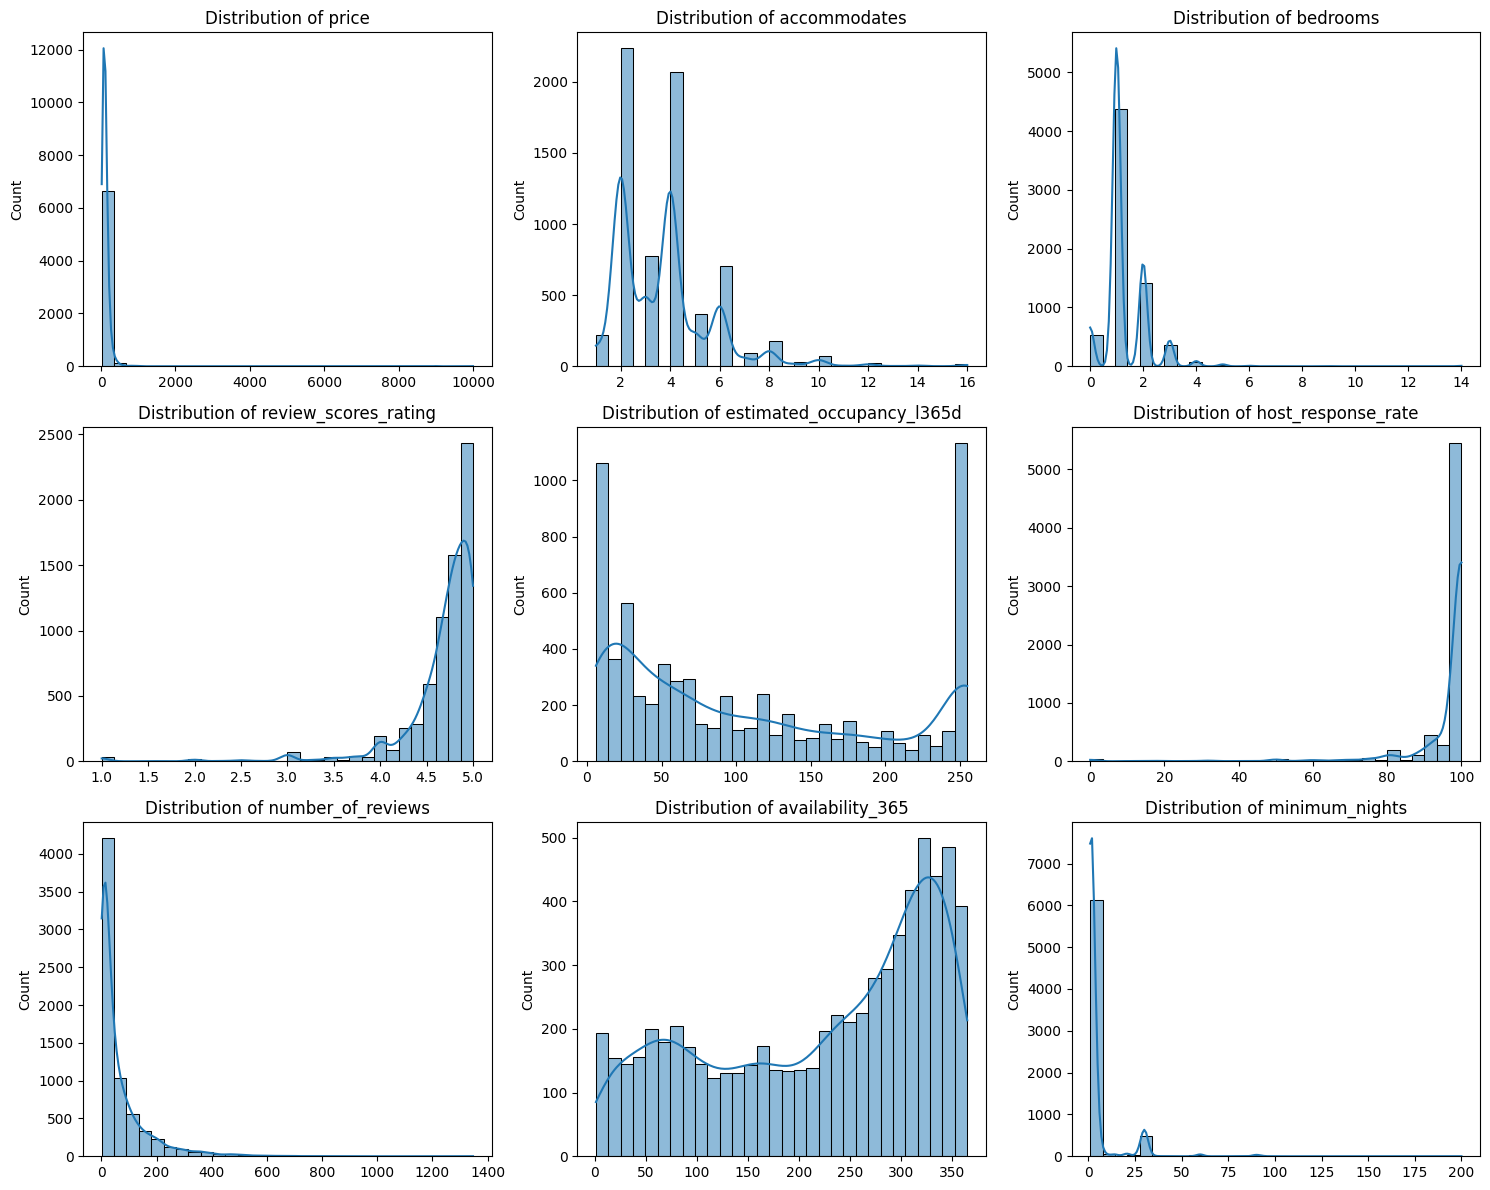

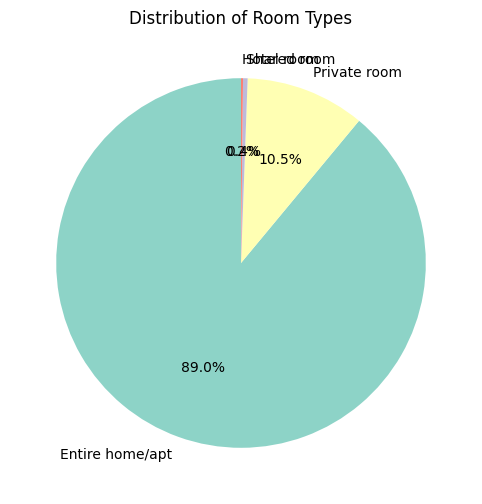

Visualizations completed!


In [18]:
def create_airbnb_visualizations(df):
    """
    Create a comprehensive set of visualizations for Airbnb data
    """
    print("Creating Airbnb Data Visualizations...")
    
    # 1. Quick overview of distributions
    fig, axes = plt.subplots(3, 3, figsize=(15, 12))
    axes = axes.flatten()
    
    features_to_plot = ['price', 'accommodates', 'bedrooms', 
                        'review_scores_rating', 'estimated_occupancy_l365d',
                        'host_response_rate', 'number_of_reviews',
                        'availability_365', 'minimum_nights']
    
    for idx, feature in enumerate(features_to_plot):
        if idx < len(axes) and feature in df.columns:
            sns.histplot(df[feature].dropna(), ax=axes[idx], kde=True, bins=30)
            axes[idx].set_title(f'Distribution of {feature}')
            axes[idx].set_xlabel('')
    
    plt.tight_layout()
    plt.show()
    
    # 2. Room type distribution
    plt.figure(figsize=(10, 6))
    room_counts = df['room_type'].value_counts()
    plt.pie(room_counts.values, labels=room_counts.index, autopct='%1.1f%%',
            colors=sns.color_palette('Set3'), startangle=90)
    plt.title('Distribution of Room Types')
    plt.show()
    
    print("Visualizations completed!")

# Run the function
create_airbnb_visualizations(df_cleaned)